In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os.path import join as pjoin
import os
import numpy as np
import tqdm

In [84]:
files = os.listdir('results_realRIRs')

dataframes = []
for file in files:
    dataframes.append(pd.read_csv(pjoin('results_realRIRs', file)))
df = pd.concat(dataframes )
df = df.reset_index()
df = df.rename(columns={'index': 'id'})

In [85]:
df = df.replace('DFN3', 'DNS5')
df = df.replace('multiband', 'MB')
df = df.replace('recdirectivity', 'REC+MB')
df = df.replace('recsourcedirectivity', 'SRC+REC+MB')
df = df.replace('singleband', 'SB')
df = df.replace('soundspaces', 'SSPA')

In [86]:
columns = ['DNS5', 'SB', 'MB', 'REC+MB', 'SRC+REC+MB', 'SSPA']

In [87]:
rows = ['sisdr_i', 'squim_sisdr_i', 'sdr_i', 'lsd_i', 'mcd_i', 'pesq_i', 'pesq2_i', 'squim_pesq_i',
        'dnsmos_ovrl_i', 'squim_mos_i', 'nisqa_mos_i', 'stoi_i', 'squim_stoi_i',
        'phonsim_i', 'spksim_i', 'sBertSim_i']

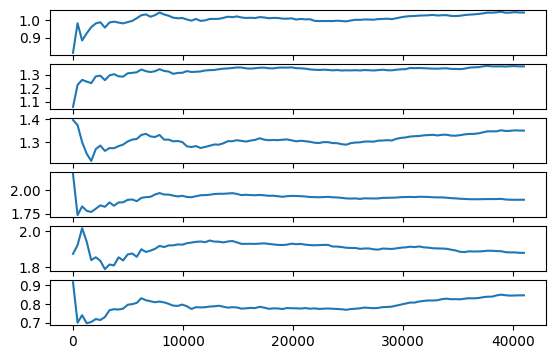

In [88]:
for i, c in enumerate(columns):
    x = df[df['train_rirs']== c ]
    sisdri = []
    squim = []
    for k in ks:
        aux = x[:k]
        sisdri.append(np.mean(aux.sisdr_i))
        squim.append(np.mean(aux.squim_sisdr_i))
    plt.subplot( 7, 1, int(i+1))
    plt.plot(ks, sisdri)